In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [2]:
df = pd.read_csv('../dataframes/marketing_digital_after_accessing_cleaning_with_specific_dtypes.csv')
df = df.astype({
    'month': 'category',
    'day': 'int16',
    'campaign_number': 'category',
    'user_engagement': 'category',
    'displays': 'int32',
    'cost': 'float16',
    'clicks': 'int16',
    'revenue': 'float16',
    'post_click_conversions': 'int16',
    'post_click_sales_amount': 'float32',
    'updated_placement': 'category',
    'banner_width': 'int64',
    'banner_height': 'int64',
    'banner_area': 'int64'
})
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   month                    15403 non-null  category
 1   day                      15403 non-null  int16   
 2   campaign_number          15403 non-null  category
 3   user_engagement          15403 non-null  category
 4   displays                 15403 non-null  int32   
 5   cost                     15403 non-null  float16 
 6   clicks                   15403 non-null  int16   
 7   revenue                  15403 non-null  float16 
 8   post_click_conversions   15403 non-null  int16   
 9   post_click_sales_amount  15403 non-null  float32 
 10  updated_placement        15403 non-null  category
 11  banner_width             15403 non-null  int64   
 12  banner_height            15403 non-null  int64   
 13  banner_area              15403 non-null  int64   
dtypes: cat

**Q12) Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?**

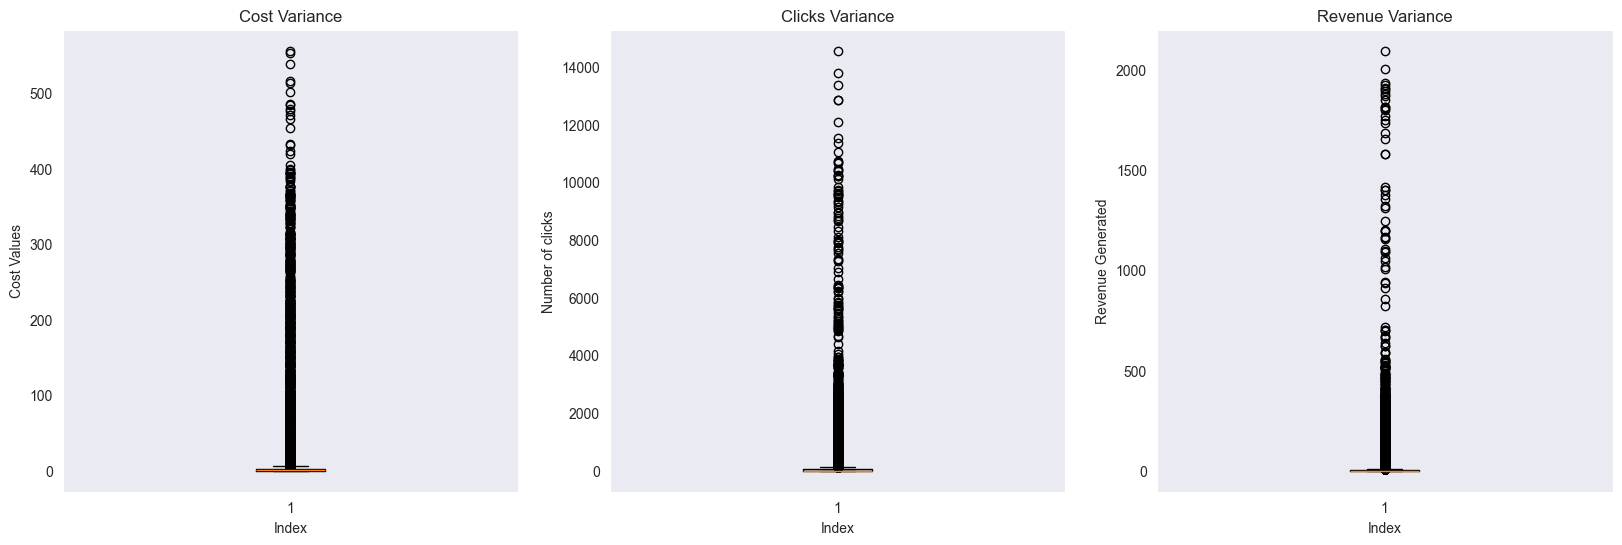

In [81]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize = (20,6))
ax[0].boxplot(df['cost'])
ax[1].boxplot(df['clicks'])
ax[2].boxplot(df['revenue'])

ax[0].set_title('Cost Variance')
ax[0].set_ylabel('Cost Values')
ax[0].set_xlabel('Index')

ax[1].set_title('Clicks Variance')
ax[1].set_ylabel('Number of clicks')
ax[1].set_xlabel('Index')

ax[2].set_title('Revenue Variance')
ax[2].set_ylabel('Revenue Generated')
ax[2].set_xlabel('Index')

plt.show()

In [28]:
df['cost'] = df['cost'].astype('float32')
df['clicks'] = df['clicks'].astype('int32')
df['revenue'] = df['revenue'].astype('float32')

In [36]:
q12_df = df[['cost','clicks','revenue']]

In [45]:
Q3 = q12_df[['cost','clicks','revenue']].quantile(0.75).reset_index()

In [44]:
Q1 = q12_df[['cost','clicks','revenue']].quantile(0.25).reset_index()

In [50]:
q12_describe = Q1.merge(Q3)

In [63]:
q12_describe['IQR'] = q12_describe[0.75] - q12_describe[0.25]
q12_describe['1.5*IQR'] = q12_describe['IQR'] * 1.5
q12_describe['upper_bound'] = q12_describe[0.75] + q12_describe['1.5*IQR']
q12_describe['lower_bound'] = q12_describe[0.25] - q12_describe['1.5*IQR']

In [64]:
q12_describe

,index,0.25,0.75,IQR,1.5*IQR,upper_bound,lower_bound
0,cost,0.024048,2.537109,2.513062,3.769592,6.306702,-3.745544
1,clicks,0.000000,53.000000,53.000000,79.500000,132.500000,-79.500000
2,revenue,0.000000,3.841797,3.841797,5.762695,9.604492,-5.762695


**Outliers for Cost**

In [73]:
df[(df['cost'] > (q12_describe.loc[0]['upper_bound'])) | (df['cost'] < (q12_describe.loc[0]['lower_bound']))]

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
9,April,1,camp 1,Medium,20152,11.164062,185,33.937500,13,653.189575,mno,160,600,96000
10,April,1,camp 1,High,56499,50.531250,309,56.687500,105,4288.669922,def,240,400,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,June,30,camp 1,High,117364,208.125000,1235,139.000000,789,37919.195312,ghi,728,90,65520
15322,June,30,camp 1,High,147455,105.687500,649,73.000000,424,17025.855469,mno,728,90,65520
15331,June,30,camp 1,Medium,4792,8.375000,113,12.726562,11,653.658081,ghi,728,90,65520
15337,June,30,camp 3,High,6556,6.695312,65,3.660156,15,607.866516,ghi,240,400,96000


**Outliers for Clicks**

In [74]:
df[(df['clicks'] > (q12_describe.loc[1]['upper_bound'])) | (df['clicks'] < (q12_describe.loc[1]['lower_bound']))]

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
9,April,1,camp 1,Medium,20152,11.164062,185,33.937500,13,653.189575,mno,160,600,96000
10,April,1,camp 1,High,56499,50.531250,309,56.687500,105,4288.669922,def,240,400,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,June,30,camp 1,High,27059,45.437500,229,25.000000,316,15489.031250,mno,580,400,232000
15320,June,30,camp 1,High,117364,208.125000,1235,139.000000,789,37919.195312,ghi,728,90,65520
15322,June,30,camp 1,High,147455,105.687500,649,73.000000,424,17025.855469,mno,728,90,65520
15362,June,30,camp 3,Medium,49675,4.816406,182,10.250000,0,0.000000,mno,300,250,75000


**Outliers for Revenue**

In [75]:
df[(df['revenue'] > (q12_describe.loc[2]['upper_bound'])) | (df['revenue'] < (q12_describe.loc[2]['lower_bound']))]

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
9,April,1,camp 1,Medium,20152,11.164062,185,33.937500,13,653.189575,mno,160,600,96000
10,April,1,camp 1,High,56499,50.531250,309,56.687500,105,4288.669922,def,240,400,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,June,30,camp 1,High,117364,208.125000,1235,139.000000,789,37919.195312,ghi,728,90,65520
15322,June,30,camp 1,High,147455,105.687500,649,73.000000,424,17025.855469,mno,728,90,65520
15331,June,30,camp 1,Medium,4792,8.375000,113,12.726562,11,653.658081,ghi,728,90,65520
15362,June,30,camp 3,Medium,49675,4.816406,182,10.250000,0,0.000000,mno,300,250,75000


**The following are the conclusions regarding outliers related to cost, clicks, and revenues.**
- It is evident from the boxplot for each section that outliers are present in all of them.
- Upon conducting a more detailed analysis, it is determined that the cost section contains 2515 outliers, the clicks section has 2325 outliers, and the revenue section has 2512 outliers, out of a total of 15403 values.

**Q13)How does the effectiveness of campaigns vary based on the size of the ad and placement type?**

In [82]:
df2 = pd.read_csv('../dataframes/online_advertising_performance_data.csv')
df['banner'] = df2['banner']
df['banner'] = df['banner'].astype('category')

In [98]:
q11_df = df[df['updated_placement'].isin(['abc','def','ghi','jkl','mno'])]
updated_index = q11_df['updated_placement'] != 'No Data Available'
df['post_click_conversions_rate'] = (q11_df['post_click_conversions'] / q11_df['clicks']) * 100
df['post_click_conversions_rate'].fillna(0,inplace=True)

**An overall summary of each section with respect to each banner and placement pair for each campaign**

In [117]:
df.pivot_table(index = ['banner','updated_placement'],columns='campaign_number',values = ['clicks','revenue','post_click_conversions','post_click_sales_amount'],aggfunc='sum')

clicks                post_click_conversions  \
campaign_number              camp 1  camp 2 camp 3                 camp 1   
banner    updated_placement                                                 
160 x 600 No Data Available       0       0      0                      1   
          abc                     0       3      0                      0   
          def                  8612    8479   3166                   2386   
          ghi                  7742    1983     74                   3930   
          jkl                     0       0      0                      0   
          mno                 89876   91645  27980                  40687   
240 x 400 No Data Available       0       0      0                      0   
          abc                     0       0      0                      0   
          def                 15502   27453   5495                   5001   
          ghi                557480  287355  21440                 204508   
          jkl                 29382   19706   3492                  13493   
          mno                 78969   52983  13997                  39202   
300 x 250 No Data Available       0       0      0                      0   
          abc                   229       8     33                    140   
          def                 14094   13738  11100                   8070   
          ghi                 63032   48233   6321                  25942   
          jkl                  2044     409     85                    854   
          mno                132609   79608  39671                  81315   
468 x 60  No Data Available       0       0      0                      0   
          abc                     0       0      0                      0   
          def                   157     202     77                    112   
          ghi                    76      18      3                     94   
          jkl                     3       1      0                      1   
          mno                   366     309     83                    328   
580 x 400 No Data Available       0       0      0                      0   
          abc                     0       0      0                      0   
          def                     0       0      0                      0   
          ghi                     0       0      0                      0   
          jkl                     0       0      0                      0   
          mno                 49559   50436  20686                  30711   
670 x 90  No Data Available       0       0      0                      0   
          abc                     0       0      0                      0   
          def                  3478    2028   2257                   1566   
          ghi                  8406    3007    112                   4167   
          jkl                   291     435     55                    136   
          mno                  8792    6620   1722                   4453   
728 x 90  No Data Available       1       2      2                      1   
          abc                  1121       2    188                    668   
          def                 25985   25523   8749                  11229   
          ghi                187807   50969   2991                  90383   
          jkl                 11307    6728   1125                   5625   
          mno                112202  103270  31634                  58076   
800 x 250 No Data Available       0       0      0                      0   
          abc                     0       0      0                      0   
          def                     0       0      0                      0   
          ghi                     0       0      0                      0   
          jkl                     0       0      0                      0   
          mno                     4       5      3                      3   

                                          post_click_sales_amount  \
campaign_number             camp

In [108]:
banner_placement_clicks = df.pivot_table(index = ['banner','updated_placement'],columns='campaign_number',values = ['clicks'],aggfunc='sum')
banner_placement_clicks

clicks               
campaign_number              camp 1  camp 2 camp 3
banner    updated_placement                       
160 x 600 No Data Available       0       0      0
          abc                     0       3      0
          def                  8612    8479   3166
          ghi                  7742    1983     74
          jkl                     0       0      0
          mno                 89876   91645  27980
240 x 400 No Data Available       0       0      0
          abc                     0       0      0
          def                 15502   27453   5495
          ghi                557480  287355  21440
          jkl                 29382   19706   3492
          mno                 78969   52983  13997
300 x 250 No Data Available       0       0      0
          abc                   229       8     33
          def                 14094   13738  11100
          ghi                 63032   48233   6321
          jkl                  2044     409     85
          mno                132609   79608  39671
468 x 60  No Data Available       0       0      0
          abc                     0       0      0
          def                   157     202     77
          ghi                    76      18      3
          jkl                     3       1      0
          mno                   366     309     83
580 x 400 No Data Available       0       0      0
          abc                     0       0      0
          def                     0       0      0
          ghi                     0       0      0
          jkl                     0       0      0
          mno                 49559   50436  20686
670 x 90  No Data Available       0       0      0
          abc                     0       0      0
          def                  3478    2028   2257
          ghi                  8406    3007    112
          jkl                   291     435     55
          mno                  8792    6620   1722
728 x 90  No Data Available       1       2      2
          abc                  1121       2    188
          def                 25985   25523   8749
          ghi                187807   50969   2991
          jkl                 11307    6728   1125
          mno                112202  103270  31634
800 x 250 No Data Available       0       0      0
          abc                     0       0      0
          def                     0       0      0
          ghi                     0       0      0
          jkl                     0       0      0
          mno                     4       5      3

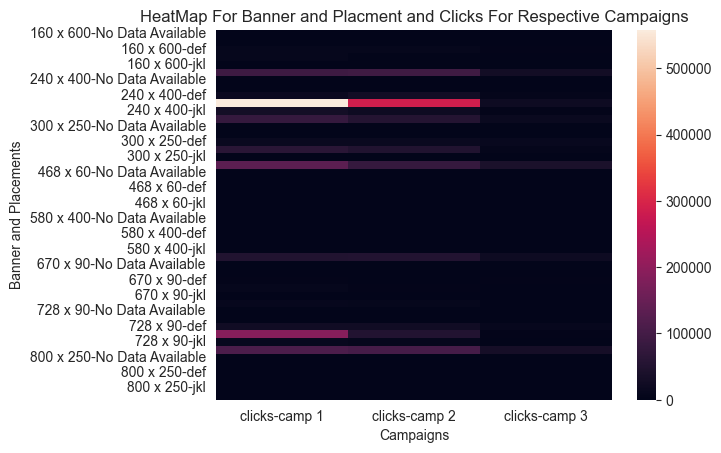

In [113]:
sns.heatmap(banner_placement_clicks)
plt.title('HeatMap For Banner and Placment and Clicks For Respective Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Banner and Placements')
plt.show()

**The efficacy of campaigns demonstrates variance contingent upon both ad size and placement type, as follows:**
- While there are various other factors contributing to the determination of the campaign's effectiveness, we have focused our analysis primarily on the number of clicks as a key metric.
- The observation revealed that, considering all campaigns, the combination of 240 x 600 ads under placement "ghi" generated the highest number of clicks.
- Regarding camp 1 and camp 2, the 240 x 600 ad placement under "ghi" combination was the most productive.
- Camp 3 exhibited minimal deviation across all combinations, consistently yielding clicks within the range of 30000-40000.

**Q14)Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?**

In [118]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner,post_click_conversions_rate
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600,0.000000
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600,14.556962
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600,49.367089
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600,34.354120
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600,0.000000


In [119]:
df['return'] = df['revenue'] - df['cost']

In [120]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600,0.000000,-0.006001
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600,14.556962,2.187500
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600,49.367089,1.359375
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600,34.354120,112.625000
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600,0.000000,0.116333


In [128]:
campaign_ROI = df.pivot_table(index = 'campaign_number',values = ['cost','revenue','return'],aggfunc='sum')
campaign_ROI

,cost,return,revenue
campaign_number,,,
camp 1,150687.562500,79846.804688,230534.359375
camp 2,17037.576172,17852.363281,34889.941406
camp 3,7466.770020,3371.936768,10838.707031


In [132]:
campaign_ROI['ROI'] = (campaign_ROI['return'] / campaign_ROI['cost']) * 100

In [140]:
campaign_ROI

,cost,return,revenue,ROI
campaign_number,,,,
camp 1,150687.562500,79846.804688,230534.359375,52.988319
camp 2,17037.576172,17852.363281,34889.941406,104.782295
camp 3,7466.770020,3371.936768,10838.707031,45.159241


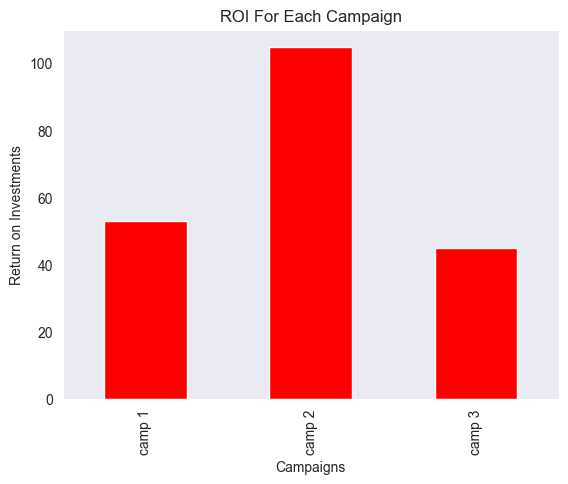

In [142]:
campaign_ROI['ROI'].plot(kind = 'bar',color = 'r')
plt.title('ROI For Each Campaign')
plt.xlabel('Campaigns')
plt.ylabel('Return on Investments')
plt.show()

In [145]:
banner_ROI = df.pivot_table(index = 'banner',values = ['cost','revenue','return'],aggfunc='sum')
banner_ROI['ROI'] = (banner_ROI['return'] / banner_ROI['cost']) * 100
banner_ROI

,cost,return,revenue,ROI
banner,,,,
160 x 600,17516.203125,5997.761230,23513.964844,34.241219
240 x 400,56415.558594,73516.210938,129931.773438,130.311935
300 x 250,35438.347656,7732.931152,43171.277344,21.820801
468 x 60,192.653809,-105.067482,87.586334,-54.536934
580 x 400,8978.720703,2214.406494,11193.126953,24.662828
670 x 90,3817.914062,204.938156,4022.852051,5.367805
728 x 90,52829.730469,11511.614258,64341.347656,21.790031
800 x 250,2.772471,-1.689860,1.082611,-60.951401


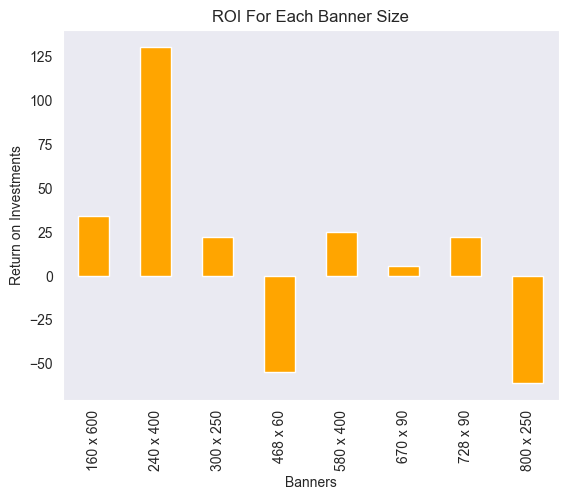

In [151]:
banner_ROI['ROI'].plot(kind = 'bar',color = 'orange')
plt.title('ROI For Each Banner Size')
plt.xlabel('Banners')
plt.ylabel('Return on Investments')
plt.show()

**Conclusions drawn regarding specific campaigns and banners outperforming others.**
- Campaign 2 demonstrates the highest ROI, exceeding 100%, in comparison to Campaign 1, which yields slightly above 50%, followed by Campaign 3 with a 45% ROI.
- The 240 x 400 banner achieves an exceptional ROI of approximately 130%, whereas the 800 x 250 banner yields a considerably unfavorable ROI of -61%.

**Q15) What is the distribution of post-click conversions across different placement types?**

In [202]:
q11_df.pivot_table(index = 'updated_placement',values = ['post_click_conversions'],aggfunc=['sum','max'])

,sum,max
,post_click_conversions,post_click_conversions
updated_placement,,
No Data Available,0,NaN
abc,824,96.0
def,29853,217.0
ghi,337063,3369.0
jkl,20853,403.0
mno,263167,1582.0


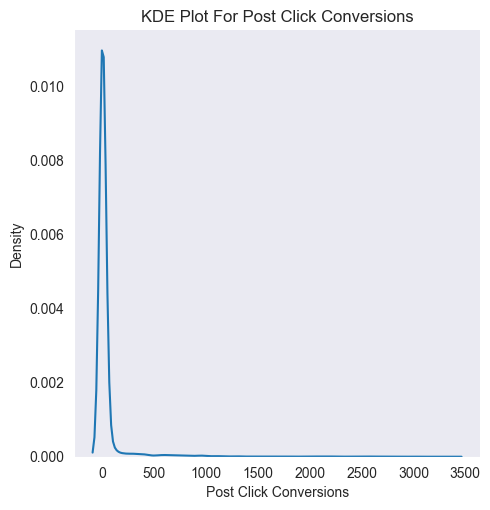

In [330]:
sns.displot(kind = 'kde',data = q11_df,x = 'post_click_conversions')
plt.title('KDE Plot For Post Click Conversions')
plt.xlabel('Post Click Conversions')
plt.ylabel('Density')
plt.show()

In [196]:
df['post_click_conversions'].skew()

8.321499482931099

In [197]:
df['post_click_conversions'].kurtosis()

83.82156425081357

In [200]:
df['post_click_conversions'].mean()

42.3139648120496

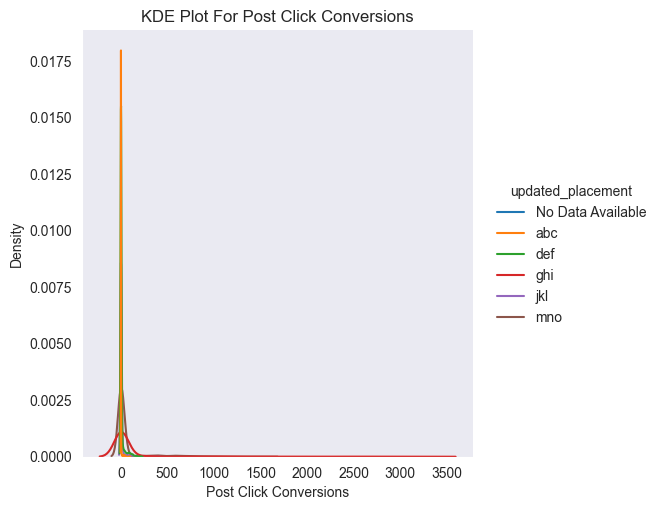

In [331]:
sns.displot(kind = 'kde',data = q11_df,x = 'post_click_conversions',hue = 'updated_placement')
plt.title('KDE Plot For Post Click Conversions')
plt.xlabel('Post Click Conversions')
plt.ylabel('Density')
plt.show()

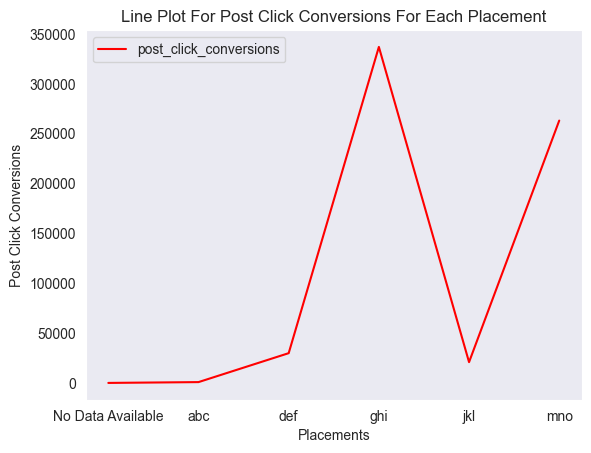

In [332]:
df.pivot_table(index = 'updated_placement',values = ['post_click_conversions'],aggfunc='sum').plot(kind = 'line',c = 'r')
plt.title('Line Plot For Post Click Conversions For Each Placement')
plt.xlabel('Placements')
plt.ylabel('Post Click Conversions')
plt.show()

**Conclusions drawn regarding the distribution of post-click conversions across various placement types.**
- The distribution of post-click conversions across various placements exhibits positive skewness and high kurtosis, both collectively and when examined individually for each placement.
- Outliers are evident within each placement when examined individually.
- Post-click conversions are at their peak for placement "ghi" and at their lowest for placement "abc".

**Q16)Are there any noticeable differences in user engagement levels between weekdays and weekends?**

>The year chosen for analysis in 2020.

In [208]:
import datetime as dt

In [245]:
df['day'] = df['day'].astype('int16')

In [249]:
df['month'].value_counts()

month
April    6267
May      4705
June     4431
Name: count, dtype: int64

In [265]:
df['month_num'] = 0

In [271]:
def month_check(df):
    for i in df.index:
        month = df.iloc[i]['month']
        if(month == 'April'):
            df.at[i,'month_num'] = 4
        elif(month == 'May'):
            df.at[i,'month_num'] = 5
        elif(month == 'June'):
            df.at[i,'month_num'] = 6

In [272]:
month_check(df)

In [276]:
df['month_num'] = df['month_num'].astype('int16')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   month                        15403 non-null  category
 1   day                          15403 non-null  int16   
 2   campaign_number              15403 non-null  category
 3   user_engagement              15403 non-null  category
 4   displays                     15403 non-null  int32   
 5   cost                         15403 non-null  float32 
 6   clicks                       15403 non-null  int32   
 7   revenue                      15403 non-null  float32 
 8   post_click_conversions       15403 non-null  int16   
 9   post_click_sales_amount      15403 non-null  float32 
 10  updated_placement            15403 non-null  category
 11  banner_width                 15403 non-null  int64   
 12  banner_height                15403 non-null  int64   
 13  b

In [312]:
def day_check(df):
    for i in df.index:
        day = df.iloc[i]['day']
        month = df.iloc[i]['month_num']
        year = 2020
        date_string = f"{year}-{month:02d}-{day:02d}"
        time_stamp = pd.Timestamp(date_string)
        df.at[i,'Day'] = (time_stamp.day_name())

In [313]:
day_check(df)

In [314]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600,0.000000,-0.006001,4,Wednesday,0
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600,14.556962,2.187500,4,Wednesday,0
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600,49.367089,1.359375,4,Wednesday,0
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600,34.354120,112.625000,4,Wednesday,0
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600,0.000000,0.116333,4,Wednesday,0


In [320]:
df['Day'] = df['Day'].astype('category')

In [317]:
df['Weekend'] = df['Day'].apply(lambda x: 1 if (x == 'Sunday') or (x == 'Saturday') else 0)

In [328]:
weekend_user_crosstab = pd.crosstab(df['user_engagement'],df['Weekend'])
weekend_user_crosstab # 0 -> weekday and 1 -> weekend

Weekend,0,1
user_engagement,,
High,3474,1407
Low,3601,1432
Medium,3920,1569


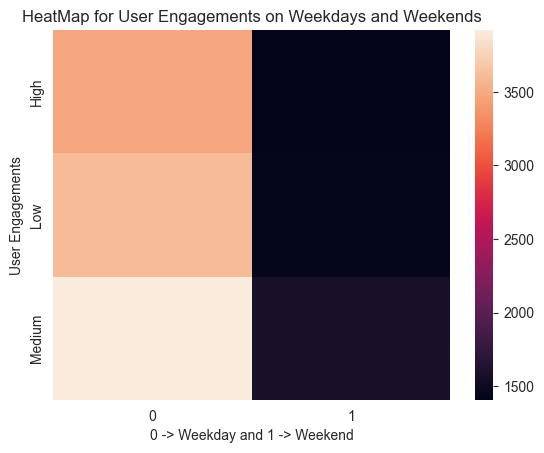

In [333]:
sns.heatmap(weekend_user_crosstab)
plt.title('HeatMap for User Engagements on Weekdays and Weekends')
plt.xlabel('0 -> Weekday and 1 -> Weekend')
plt.ylabel('User Engagements')
plt.show()

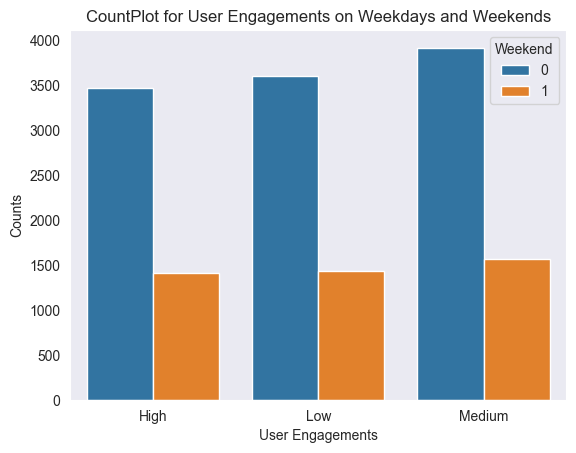

In [336]:
sns.countplot(data = df, x = 'user_engagement',hue = 'Weekend')
plt.title('CountPlot for User Engagements on Weekdays and Weekends')
plt.xlabel('User Engagements')
plt.ylabel('Counts')
plt.show()

**Conclusions regarding user engagement in relation to weekdays versus weekends.**
- Engagement levels in each category notably peak during weekdays compared to weekends.
- During weekends, user engagement across high, medium, and low sections is observed to be nearly equal.
- On weekdays, medium engagement edges out low engagement, followed by high engagement, with only slight differences.

**Q17)How does the cost per click (CPC) vary across different campaigns and banner sizes?**

In [337]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600,0.000000,-0.006001,4,Wednesday,0
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600,14.556962,2.187500,4,Wednesday,0
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600,49.367089,1.359375,4,Wednesday,0
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600,34.354120,112.625000,4,Wednesday,0
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600,0.000000,0.116333,4,Wednesday,0


In [340]:
df['cost_per_click'] = df['cost'] / df['clicks']

In [341]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,...,160,600,96000,160 x 600,0.000000,-0.006001,4,Wednesday,0,inf
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,...,160,600,96000,160 x 600,14.556962,2.187500,4,Wednesday,0,0.169502
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,...,160,600,96000,160 x 600,49.367089,1.359375,4,Wednesday,0,0.174842
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,...,160,600,96000,160 x 600,34.354120,112.625000,4,Wednesday,0,0.120754
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,...,160,600,96000,160 x 600,0.000000,0.116333,4,Wednesday,0,0.067017


**There are many campaigns which have some cost with zero clicks.**
**We will ignore such campaigns.**

In [348]:
q17_df = df[df['clicks'] != 0]
q17_df.sample(5)

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click
15142,June,29,camp 1,High,4282,2.572266,10,1.000000,5,388.389709,...,300,250,75000,300 x 250,50.000000,-1.572266,6,Monday,0,0.257227
10953,May,31,camp 3,Medium,3158,0.206055,17,0.925293,0,0.000000,...,670,90,60300,670 x 90,0.000000,0.719238,5,Sunday,1,0.012121
9666,May,23,camp 1,Medium,309,0.136353,5,0.533203,1,87.158401,...,670,90,60300,670 x 90,20.000000,0.396851,5,Saturday,1,0.027271
10585,May,29,camp 1,Medium,10013,3.185547,68,7.375000,11,325.959015,...,728,90,65520,728 x 90,16.176471,4.189453,5,Friday,0,0.046846
5160,April,25,camp 3,Medium,12339,9.992188,161,8.585938,0,0.000000,...,240,400,96000,240 x 400,0.000000,-1.406250,4,Saturday,1,0.062063


**Analysing with respect to campaigns.We would calculate mean cost per click for each campaign.**

In [361]:
camp_cost_per_click = q17_df.pivot_table(index = 'campaign_number',values='cost_per_click',aggfunc='mean')
camp_cost_per_click

,cost_per_click
campaign_number,
camp 1,0.112412
camp 2,0.029966
camp 3,0.063791


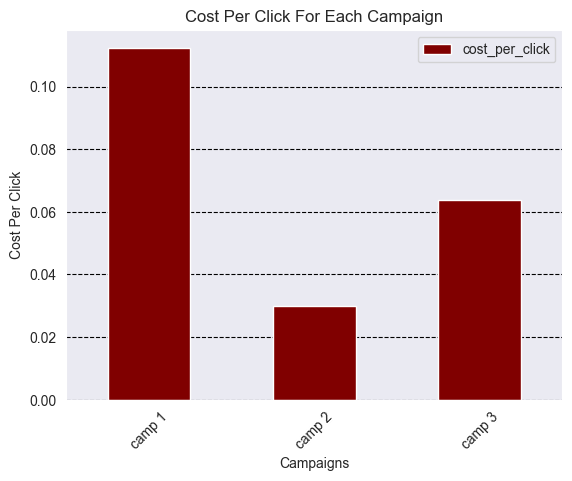

In [383]:
camp_cost_per_click.plot(kind = 'bar',color = 'maroon')
plt.title('Cost Per Click For Each Campaign')
plt.xlabel('Campaigns')
plt.ylabel('Cost Per Click')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--',color = 'black')
plt.show()

**Analysing with respect to banner sizes.We would calculate mean cost per click for each campaign.**

In [363]:
banner_cost_per_click = q17_df.pivot_table(index = 'banner',values='cost_per_click',aggfunc='mean')
banner_cost_per_click

,cost_per_click
banner,
160 x 600,0.086023
240 x 400,0.077384
300 x 250,0.073752
468 x 60,0.121230
580 x 400,0.062879
670 x 90,0.082938
728 x 90,0.087538
800 x 250,0.011465


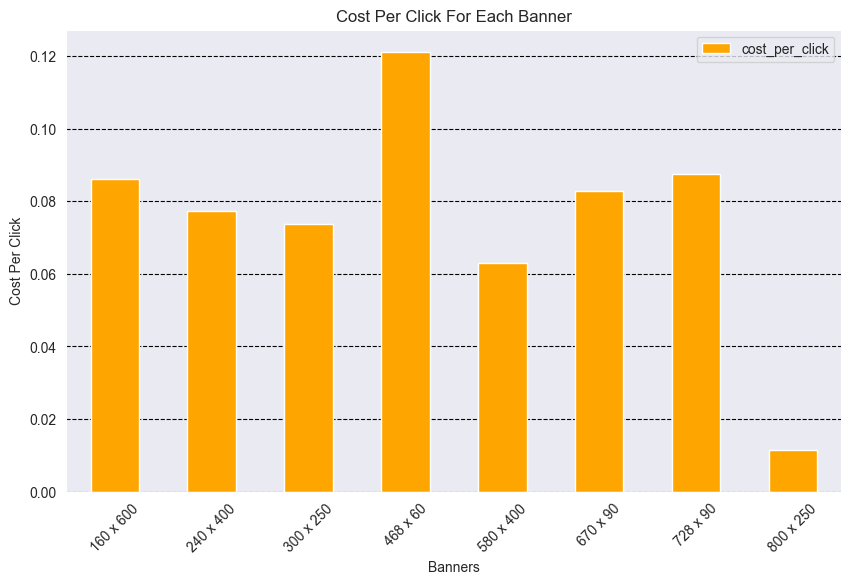

In [382]:
banner_cost_per_click.plot(kind = 'bar',color = 'orange',figsize = (10,6))
plt.title('Cost Per Click For Each Banner')
plt.xlabel('Banners')
plt.ylabel('Cost Per Click')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--',color = 'black')
plt.show()

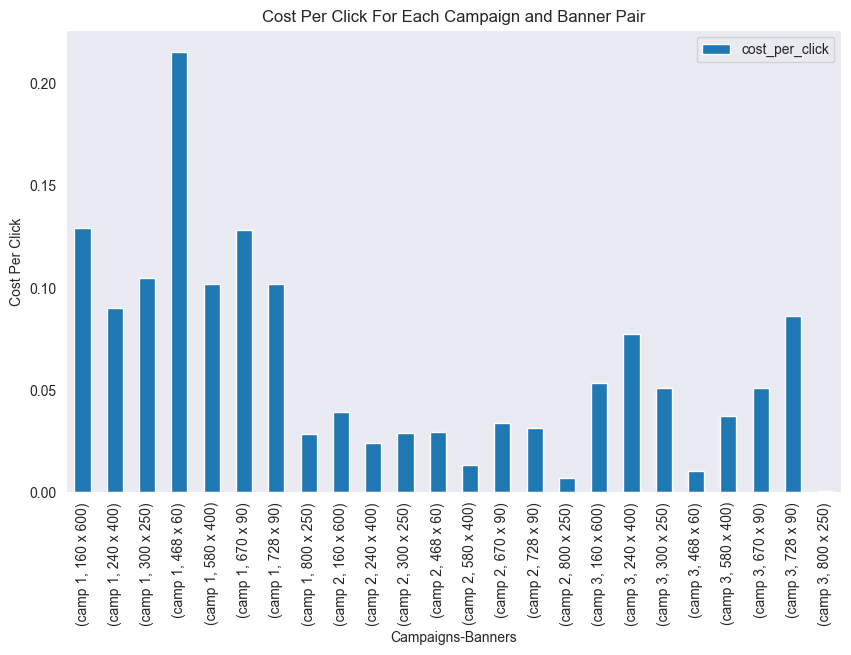

In [392]:
q17_df.pivot_table(index = ['campaign_number','banner'],values='cost_per_click',aggfunc='mean').plot(kind = 'bar',figsize = (10,6))
plt.title('Cost Per Click For Each Campaign and Banner Pair')
plt.xlabel('Campaigns-Banners')
plt.ylabel('Cost Per Click')
plt.show()

**The findings regarding the variation in cost per click (CPC) across different campaigns and banner sizes are summarized as follows:**
- Camp 1 exhibits the highest mean cost per click, followed by Camp 3 and then Camp 2.
- Hence, Camp 2 boasted the most economical rates, while Camp 1 emerged as the priciest option.
- The 468 x 60 banner size demonstrates the greatest cost per click, followed by the remaining sizes which have nearly identical CPCs. The 800 x 250 size exhibits the lowest CPC.
- After analyzing each camp-banner pair, it was observed that the combination of Camp 1 and the 468x60 banner exhibited the highest CPC compared to others, while the combination of Camp 2 and the 800x250 banner had the lowest CPC.

**Q18)Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?**

In [394]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,...,160,600,96000,160 x 600,0.000000,-0.006001,4,Wednesday,0,inf
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,...,160,600,96000,160 x 600,14.556962,2.187500,4,Wednesday,0,0.169502
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,...,160,600,96000,160 x 600,49.367089,1.359375,4,Wednesday,0,0.174842
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,...,160,600,96000,160 x 600,34.354120,112.625000,4,Wednesday,0,0.120754
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,...,160,600,96000,160 x 600,0.000000,0.116333,4,Wednesday,0,0.067017


**We would use the dataframe created in Q17.**


In [414]:
import warnings
warnings.filterwarnings('ignore')
q17_df['post_click_conversions_per_click'] = q17_df['post_click_conversions_rate'] / 100
q17_df['post_click_conversions_sales_per_click'] = q17_df['post_click_sales_amount'] / q17_df['clicks']
q17_df

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click,post_click_conversions_per_click,post_click_conversions_sales_per_click
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,...,96000,160 x 600,14.556962,2.187500,4,Wednesday,0,0.169502,0.145570,12.483925
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,...,96000,160 x 600,49.367089,1.359375,4,Wednesday,0,0.174842,0.493671,15.805466
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,...,96000,160 x 600,34.354120,112.625000,4,Wednesday,0,0.120754,0.343541,13.711205
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,...,96000,160 x 600,0.000000,0.116333,4,Wednesday,0,0.067017,0.000000,0.000000
6,April,1,camp 1,Low,2234,0.404297,10,1.834961,3,101.749397,...,96000,160 x 600,30.000000,1.430664,4,Wednesday,0,0.040430,0.300000,10.174940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,911,0.513672,6,0.337891,0,0.000000,...,65520,728 x 90,0.000000,-0.175781,6,Tuesday,0,0.085612,0.000000,0.000000
15398,June,30,camp 3,Medium,5963,0.788574,40,2.251953,3,69.425598,...,65520,728 x 90,7.500000,1.463379,6,Tuesday,0,0.019714,0.075000,1.735640
15399,June,30,camp 3,Medium,710,0.986816,22,1.238281,0,0.000000,...,65520,728 x 90,0.000000,0.251465,6,Tuesday,0,0.044855,0.000000,0.000000
15400,June,30,camp 3,Medium,490,0.168579,8,0.450439,0,0.000000,...,65520,728 x 90,0.000000,0.281860,6,Tuesday,0,0.021072,0.000000,0.000000


In [425]:
per_click_cost_sales_conversions_camp = q17_df.pivot_table(index = 'campaign_number',values = ['cost_per_click','post_click_conversions_per_click','post_click_conversions_sales_per_click'],aggfunc='mean')
per_click_cost_sales_conversions_camp

,cost_per_click,post_click_conversions_per_click,post_click_conversions_sales_per_click
campaign_number,,,
camp 1,0.112412,0.356979,18.507993
camp 2,0.029966,0.020079,1.576780
camp 3,0.063791,0.045129,4.227039


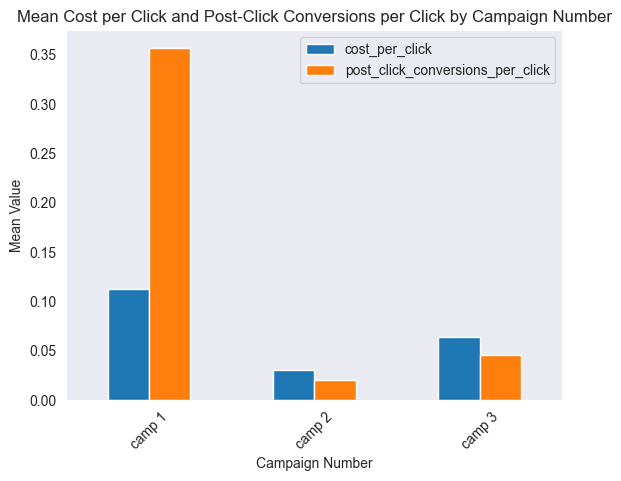

In [436]:
q17_df.pivot_table(index = 'campaign_number',values = ['cost_per_click','post_click_conversions_per_click'],aggfunc='mean').plot(kind = 'bar')
plt.title('Mean Cost per Click and Post-Click Conversions per Click by Campaign Number')
plt.xlabel('Campaign Number')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


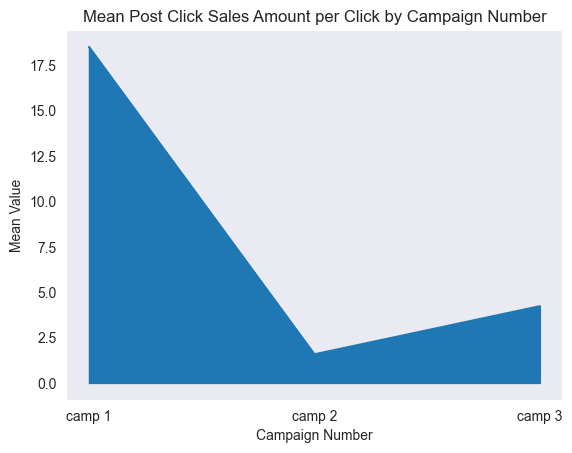

In [441]:
per_click_cost_sales_conversions_camp['post_click_conversions_sales_per_click'].plot(kind = 'area')
plt.title('Mean Post Click Sales Amount per Click by Campaign Number')
plt.xlabel('Campaign Number')
plt.ylabel('Mean Value')
plt.show()

In [428]:
per_click_cost_sales_conversions_placement = q17_df.pivot_table(index = 'updated_placement',values = ['cost_per_click','post_click_conversions_per_click','post_click_conversions_sales_per_click'],aggfunc='mean')
per_click_cost_sales_conversions_placement

,cost_per_click,post_click_conversions_per_click,post_click_conversions_sales_per_click
updated_placement,,,
No Data Available,0.006799,0.000000,0.000000
abc,0.088417,0.301971,18.221659
def,0.078329,0.152488,8.241526
ghi,0.088404,0.187649,10.121080
jkl,0.077921,0.224332,13.807163
mno,0.081188,0.182309,10.465296


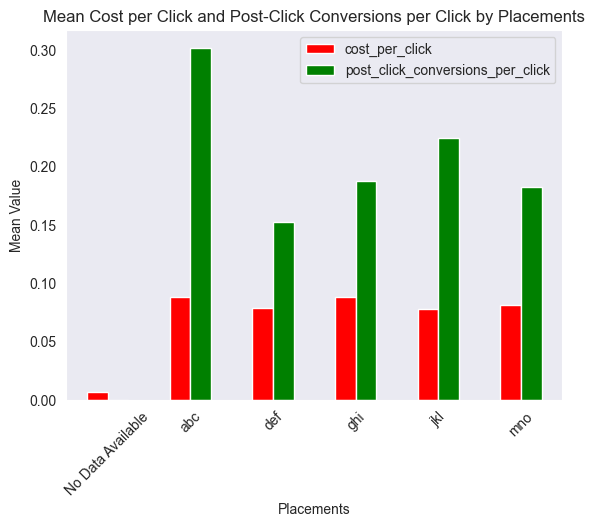

In [435]:
q17_df.pivot_table(index = 'updated_placement',values = ['cost_per_click','post_click_conversions_per_click'],aggfunc='mean').plot(kind = 'bar',color=['red', 'green'])
plt.title('Mean Cost per Click and Post-Click Conversions per Click by Placements')
plt.xlabel('Placements')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

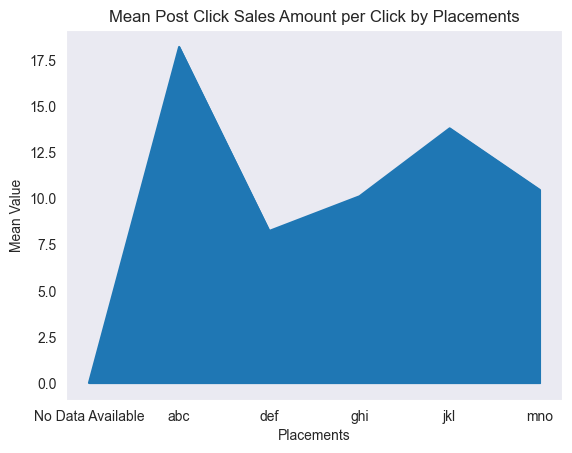

In [443]:
per_click_cost_sales_conversions_placement['post_click_conversions_sales_per_click'].plot(kind = 'area')
plt.title('Mean Post Click Sales Amount per Click by Placements')
plt.xlabel('Placements')
plt.ylabel('Mean Value')
plt.show()

**Conclusions regarding the cost-effectiveness of campaigns or placements concerning post-click conversions.We would ignore 'No Data Available' which stands for NaN Values.**
- When analyzing on a per-click basis, it is evident that Campaign 1 yields the most favorable post-click conversions.
- Post-click sales are also dominated by Campaign 1, solidifying its position as the most cost-effective option, followed by Campaign 3 and then Campaign 2.
- Placement ABC exhibits the most favorable post-click conversions per click.
- The per-click sales amount performance is optimal for placement ABC, followed by JKL, and is least for DEF.

**Q19)Can we identify any trends or patterns in post-click conversion rates based on the day of the week?**

In [498]:
day_wise_post_click_conversion_rates = df[df['clicks'] != 0].pivot_table(index = 'Day',values = 'post_click_conversions_rate',aggfunc = 'mean')
day_wise_post_click_conversion_rates

,post_click_conversions_rate
Day,
Friday,18.920526
Monday,17.607444
Saturday,16.827680
Sunday,18.295031
Thursday,20.623736
Tuesday,18.456482
Wednesday,17.483656


In [503]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_wise_post_click_conversion_rates = day_wise_post_click_conversion_rates.reindex(day_order) # ordering the day index

In [504]:
day_wise_post_click_conversion_rates

,post_click_conversions_rate
Day,
Monday,17.607444
Tuesday,18.456482
Wednesday,17.483656
Thursday,20.623736
Friday,18.920526
Saturday,16.827680
Sunday,18.295031


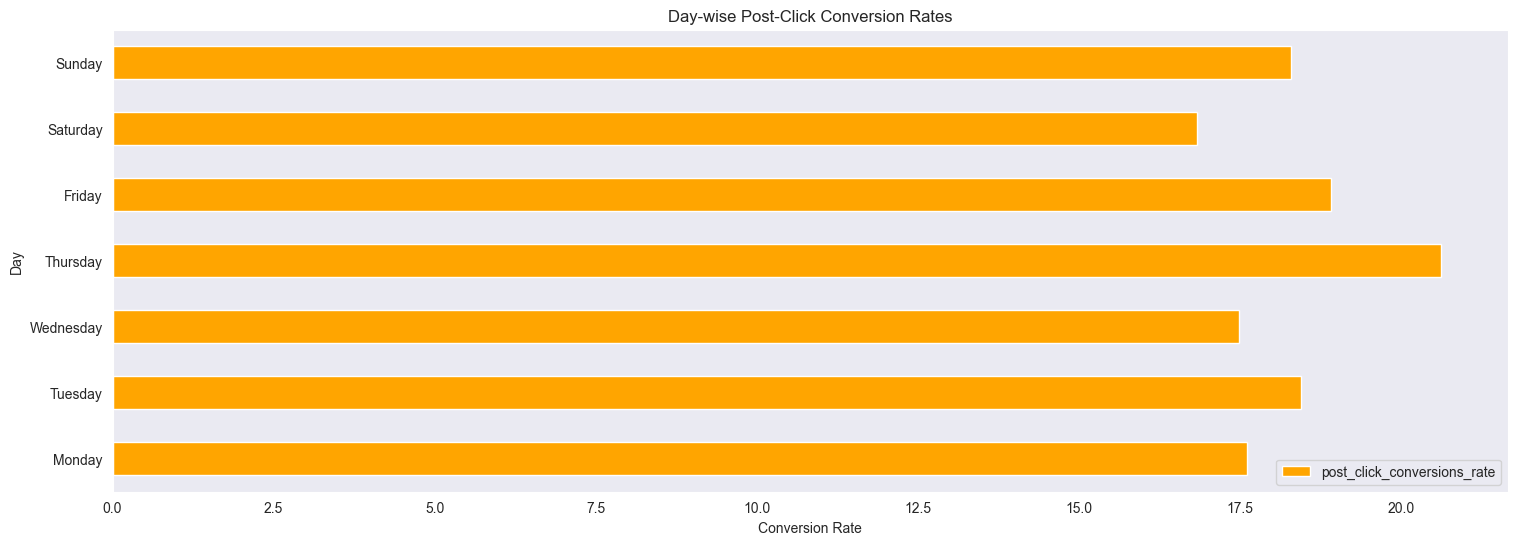

In [505]:
day_wise_post_click_conversion_rates.plot(kind = 'barh',color = 'orange',figsize = (18,6))
plt.title('Day-wise Post-Click Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Day')
plt.show()

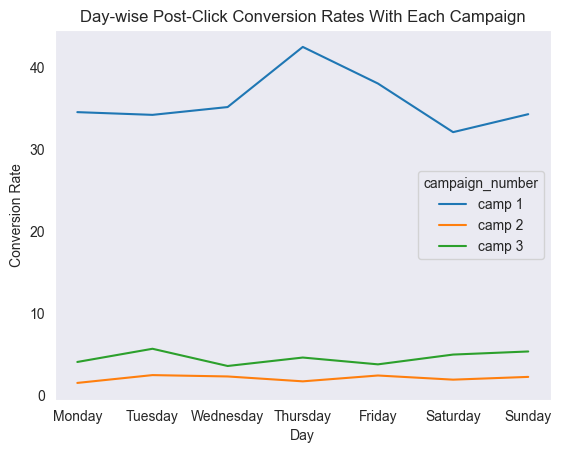

In [510]:
df[df['clicks'] != 0].pivot_table(index = 'Day',columns = 'campaign_number',values = 'post_click_conversions_rate',aggfunc = 'mean').reindex(day_order).plot()
plt.title('Day-wise Post-Click Conversion Rates With Each Campaign')
plt.xlabel('Day')
plt.ylabel('Conversion Rate')
plt.show()

**Conclusions regarding trends in post-click conversion rates with respect to days of the week.**
- Post-click conversion rates peak on Thursday, with the other days closely trailing behind.
- When analyzed by campaign, it's evident that Campaign 1 boasts the highest conversion rate, followed by Campaign 3 and then Campaign 2.
- For Campaign 1, the highest conversion rates are observed on Thursday. For Campaign 2, they are on Tuesday, and for Campaign 3, also on Tuesday.

**Q20)How does the effectiveness of campaigns vary between new users and returning users in terms of post-click conversions?**

In [512]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_width,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,...,160,600,96000,160 x 600,0.000000,-0.006001,4,Wednesday,0,inf
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,...,160,600,96000,160 x 600,14.556962,2.187500,4,Wednesday,0,0.169502
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,...,160,600,96000,160 x 600,49.367089,1.359375,4,Wednesday,0,0.174842
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,...,160,600,96000,160 x 600,34.354120,112.625000,4,Wednesday,0,0.120754
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,...,160,600,96000,160 x 600,0.000000,0.116333,4,Wednesday,0,0.067017


**New users are defined as individuals who have only one click.**

In [521]:
q20_df = df[df['clicks'] !=0]
q20_df['new_user'] = q20_df['clicks']
q20_df.head()
q20_df['new_user'] = q20_df['new_user'].apply(lambda x: 1 if x==1 else 0)

In [523]:
q20_df.sample(5)

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,...,banner_height,banner_area,banner,post_click_conversions_rate,return,month_num,Day,Weekend,cost_per_click,new_user
5908,April,29,camp 1,High,18531,14.789062,108,20.000000,46,2792.540039,...,90,60300,670 x 90,42.592593,5.210938,4,Wednesday,0,0.136936,0
4278,April,21,camp 2,Low,32,0.020996,1,0.040100,0,0.000000,...,90,60300,670 x 90,0.000000,0.019104,4,Tuesday,0,0.020996,1
5892,April,29,camp 1,Medium,543,0.334473,4,0.761719,0,0.000000,...,250,75000,300 x 250,0.000000,0.427246,4,Wednesday,0,0.083618,0
12038,June,7,camp 3,High,2069,3.205078,19,1.025391,5,199.890793,...,90,65520,728 x 90,26.315789,-2.179688,6,Sunday,1,0.168688,0
935,April,5,camp 2,Medium,3391,0.337646,10,0.388916,0,0.000000,...,60,28080,468 x 60,0.000000,0.051270,4,Sunday,1,0.033765,0


In [527]:
## 1 denotes new user 
## 0 denotes returning user
new_returning_user = q20_df.pivot_table(index = 'new_user',values='post_click_conversions_rate',aggfunc='mean')
new_returning_user

,post_click_conversions_rate
new_user,
0,17.681741
1,24.288618


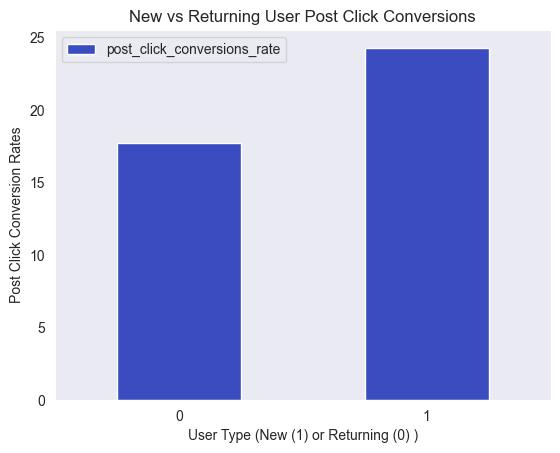

In [552]:
new_returning_user.plot(kind = 'bar',cmap='coolwarm')
plt.title('New vs Returning User Post Click Conversions')
plt.xlabel('User Type (New (1) or Returning (0) )')
plt.ylabel('Post Click Conversion Rates')
plt.xticks(rotation = 0)
plt.show()

In [528]:
new_returning_user_camp = q20_df.pivot_table(index = 'new_user',columns='campaign_number',values='post_click_conversions_rate',aggfunc='mean')
new_returning_user_camp

campaign_number,camp 1,camp 2,camp 3
new_user,,,
0,34.959924,1.892305,4.235503
1,42.126789,3.703704,7.246377


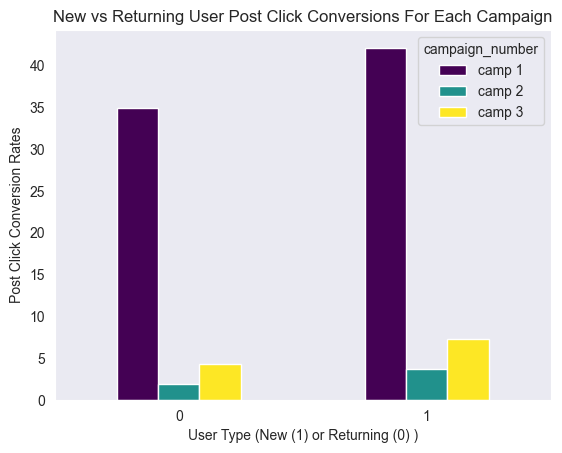

In [551]:
new_returning_user_camp.plot(kind = 'bar',cmap='viridis')
plt.title('New vs Returning User Post Click Conversions For Each Campaign')
plt.xlabel('User Type (New (1) or Returning (0) )')
plt.ylabel('Post Click Conversion Rates')
plt.xticks(rotation = 0)
plt.show()

**Here are the conclusions regarding the effectiveness of the campaign concerning post-click conversion rates for both new and returning users.**
- New users demonstrate superior post-click conversion rates compared to returning users in the analyzed campaigns.
- A consistent trend is observed across all three campaigns, with new users outperforming returning users in terms of post-click conversion rates.